# Classifier MLP on fashion MNIST

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [2]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255. #scaling down pixel intensities to range 0-1

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train[0]])
print(X_train[0])

Ankle boot
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.0039

In [18]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
print(model.layers)
print(model.layers[1].get_weights())

[<Flatten name=flatten, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]
[array([[-0.03337931,  0.03747377, -0.01024377, ..., -0.00107089,
        -0.00895584, -0.06743111],
       [ 0.05525255,  0.04554481, -0.0278683 , ...,  0.00703333,
         0.04090317,  0.02132533],
       [-0.03812157,  0.06724381,  0.00868388, ...,  0.05541259,
         0.03047207, -0.03692716],
       ...,
       [-0.07099931,  0.01104944,  0.01171374, ...,  0.03190382,
         0.06557223,  0.06125234],
       [ 0.03648835, -0.0664085 ,  0.0622002 , ...,  0.0052026 ,
         0.05179936,  0.0324715 ],
       [ 0.02954513, -0.06385072, -0.06185186, ...,  0.00683699,
         0.06351274,  0.00031435]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.6809 - loss: 1.0213 - val_accuracy: 0.8254 - val_loss: 0.5061
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.8235 - loss: 0.5098 - val_accuracy: 0.8416 - val_loss: 0.4532
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - accuracy: 0.8424 - loss: 0.4563 - val_accuracy: 0.8472 - val_loss: 0.4311
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - accuracy: 0.8522 - loss: 0.4254 - val_accuracy: 0.8506 - val_loss: 0.4150
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.8602 - loss: 0.4026 - val_accuracy: 0.8532 - val_loss: 0.4034
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.8661 - loss: 0.3847 - val_accuracy: 0.8586 - val_loss: 0.3948
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.8703 - loss: 0.3698 - val_accuracy: 0.8602 - val_loss: 0.3860
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.8739 -

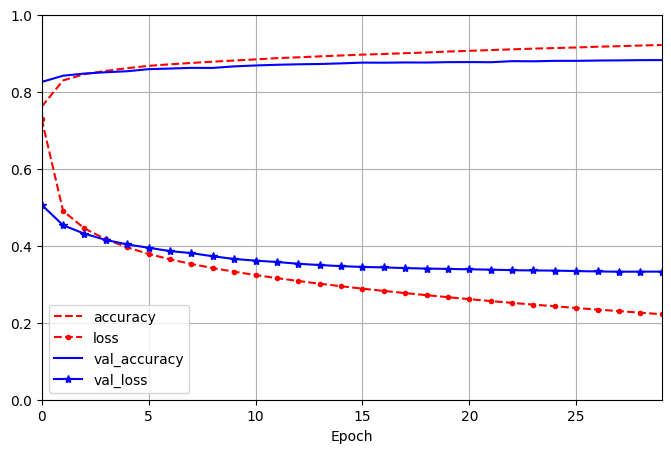

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch', style =['r--', 'r--.', 'b-', 'b-*']
)
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8810 - loss: 0.3819


[0.37273457646369934, 0.8824999928474426]

In [27]:
X_new = X_test[:3] #predicting first 3 instances from the test set
y_proba = model.predict(X_new)
print(y_proba.round(3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.    0.    0.    0.    0.    0.014 0.    0.001 0.    0.985]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


In [31]:
import numpy as np
y_pred = y_proba.argmax(axis=-1) #only choosing the indexes with the highest possibility
print(y_pred)
print(np.array(class_names)[y_pred])
print(np.array(class_names)[y_test[:3]])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
['Ankle boot' 'Pullover' 'Trouser']


# Regression MLP on California Housing

In [55]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(housing.data, housing.target, random_state=42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train_housing.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1) #only
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train_housing)
history = model.fit(X_train_housing, y_train_housing, epochs=20, validation_split = 0.1)

Epoch 1/20


C:\Users\Adam\Desktop\Studia\Cybertech\Ksiazka\C10\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - RootMeanSquaredError: 1.1580 - loss: 1.4098 - val_RootMeanSquaredError: 0.6680 - val_loss: 0.4463
Epoch 2/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - RootMeanSquaredError: 0.6364 - loss: 0.4052 - val_RootMeanSquaredError: 0.6367 - val_loss: 0.4054
Epoch 3/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - RootMeanSquaredError: 0.6067 - loss: 0.3683 - val_RootMeanSquaredError: 0.6198 - val_loss: 0.3842
Epoch 4/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - RootMeanSquaredError: 0.5942 - loss: 0.3533 - val_RootMeanSquaredError: 0.6031 - val_loss: 0.3637
Epoch 5/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - RootMeanSquaredError: 0.5793 - loss: 0.3358 - val_RootMeanSquaredError: 0.5886 - val_loss: 0.3465
Epoch 6/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - RootMeanSquaredError: 0.5643 - loss: 0.3186 - val_RootMeanSquaredError: 0.5822 - val_loss: 0.3389
Epoch 7/20
436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - RootMeanSquaredError: 0.5598 - 

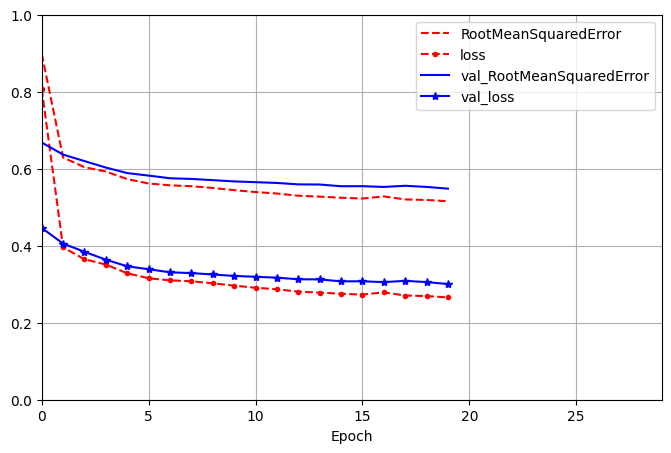

In [56]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch', style =['r--', 'r--.', 'b-', 'b-*']
)
plt.show()

In [57]:
mse_test, rmse_test = model.evaluate(X_test_housing, y_test_housing)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - RootMeanSquaredError: 0.5314 - loss: 0.2826


In [58]:
X_new = X_test_housing[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test_housing[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.5100058]
 [1.257971 ]
 [4.5515194]]
[0.477   0.458   5.00001]
